

# Project: Investigate Children Out of School

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: "Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. 

> **Questions to explore**: 
><ul>
><li><a href="#q1"> 1. Research Question 1: What is the total numbers of children out of primary school over years, indicate the male and female numbers as well?</a></li>
><li><a href="#q2"> 2. Research Question 2: What is distribution of female children who was out of primary school from 1980 to 1995?</a></li>
><li><a href="#q3"> 3. Research Question 3: What are numbers of children out of school in total, by male and female in China, 1985?</a></li> 
><li><a href="#q4"> 4. What are relationship of children out of school of female in China in russian and usa over time? Which has a better trend?</a></li>
><li><a href="#q5"> 5. Research Question 5: What is the overall trend for children out of primary school over the years?</a></li>






In [1]:
# Set up import statements for all of the packages that are planed to use;
# Include a 'magic word' so that visualizations are plotted;
# call on dataframe to display the first 5 rows.

import pandas as pd
import numpy as np
import datetime
from statistics import mode
% matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Reading an Excel file in python using pandas
# call on dataframe to display the first 5 rows

xl = pd.ExcelFile('Child out of school primary.xlsx')
 
xl.sheet_names
[u'Data']

df_tot = xl.parse("Data")
df_tot.head()


,"Children out of school, primary",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,1559835.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8445.0,15754.0,NaN,NaN,NaN,37763.0,51566.0,52014.0,53597.0
4,Algeria,NaN,NaN,NaN,806895.0,731571.0,696223.0,671496.0,646398.0,627309.0,...,190629.0,171799.0,135684.0,116195.0,104234.0,93561.0,74715.0,71175.0,81638.0,71430.0


In [3]:
x2 = pd.ExcelFile('Child out of school primiary female.xlsx')
 
x2.sheet_names
[u'Data']

df_f = x2.parse("Data")
df_f.head()

,"Children out of school, primary, female",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,923588.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5415.0,7791.0,NaN,NaN,NaN,17469.0,24446.0,24577.0,25544.0
4,Algeria,NaN,NaN,NaN,564297.0,538928.0,523330.0,509066.0,491870.0,476842.0,...,118718.0,105652.0,86044.0,75558.0,69439.0,60184.0,47538.0,47078.0,53198.0,45707.0


In [4]:
x3 = pd.ExcelFile('Child out of school primiary male.xlsx')
 
x3.sheet_names
[u'Data']

df_m = x3.parse("Data")
df_m.head()

,"Children out of school, primary, male",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,636247.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3030.0,7963.0,NaN,NaN,NaN,20294.0,27120.0,27437.0,28053.0
4,Algeria,NaN,NaN,NaN,242598.0,192643.0,172893.0,162430.0,154528.0,150467.0,...,71911.0,66147.0,49640.0,40637.0,34795.0,33377.0,27177.0,24097.0,28440.0,25723.0


In [5]:
# Check if the three dataframe have the same shape

df_tot.shape, df_m.shape, df_f.shape

((275, 43), (275, 43), (275, 43))

In [6]:
# Check if the first columns from the 3 dataframe are exactly the same
assert (df_tot['Children out of school, primary'].tolist() == df_m['Children out of school, primary, male'].tolist()\
       == df_f['Children out of school, primary, female'].tolist())

In [7]:
# Merge the 3 dataframe

df1 = df_tot.merge(df_f, how='outer', left_index = True, right_index = True)

df1 = df1.merge(df_m, how='outer', left_index = True, right_index = True)

# Confirm changes

df1.shape

(275, 129)

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [8]:
# return the datatypes of the columns.

df1.dtypes

Children out of school, primary     object
1970_x                             float64
1971_x                             float64
1972_x                             float64
1973_x                             float64
1974_x                             float64
1975_x                             float64
1976_x                             float64
1977_x                             float64
1978_x                             float64
1979_x                             float64
1980_x                             float64
1981_x                             float64
1982_x                             float64
1983_x                             float64
1984_x                             float64
1985_x                             float64
1986_x                             float64
1987_x                             float64
1988_x                             float64
1989_x                             float64
1990_x                             float64
1991_x                             float64
1992_x     

In [9]:
# check for duplicates in the data.

sum(df1.duplicated())

0

In [10]:
#  check if any value is NaN in DataFrame and in how many columns

df1.isnull().any().any(), sum(df1.isnull().any())

(True, 126)

In [11]:
# Generates descriptive statistics, excluding NaN values.

df1.describe()

,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,1.700000e+01,4.900000e+01,5.300000e+01,5.300000e+01,4.800000e+01,4.500000e+01,5.200000e+01,5.900000e+01,6.300000e+01,6.100000e+01,...,1.030000e+02,1.060000e+02,1.070000e+02,1.180000e+02,1.130000e+02,1.220000e+02,1.160000e+02,1.130000e+02,1.130000e+02,6.100000e+01
mean,6.843502e+05,1.022907e+06,3.314347e+05,3.489581e+05,4.035501e+05,4.230175e+05,3.128573e+05,3.469881e+05,3.529903e+05,2.091687e+05,...,2.018418e+05,2.408376e+05,1.905158e+05,1.686734e+05,1.623407e+05,1.380507e+05,1.396097e+05,1.440379e+05,1.187534e+05,1.168063e+05
std,1.321416e+06,4.052435e+06,8.888364e+05,6.248331e+05,9.659810e+05,1.098716e+06,8.575641e+05,7.929622e+05,7.108179e+05,3.436676e+05,...,7.617249e+05,8.209809e+05,5.361852e+05,4.837907e+05,4.911265e+05,4.478736e+05,4.994961e+05,5.184244e+05,5.176267e+05,2.918273e+05
min,4.610000e+02,0.000000e+00,1.800000e+01,1.160000e+03,1.860000e+02,0.000000e+00,2.250000e+02,8.000000e+01,1.940000e+02,2.370000e+02,...,4.800000e+01,1.000000e+00,1.100000e+01,3.500000e+01,2.100000e+01,5.000000e+00,9.000000e+00,7.900000e+01,1.000000e+00,3.060000e+02
25%,6.148100e+04,2.506400e+04,2.677500e+04,3.293600e+04,2.891925e+04,2.400000e+04,1.372125e+04,1.038000e+04,1.325100e+04,1.184300e+04,...,2.309000e+03,3.078750e+03,3.582500e+03,2.499500e+03,3.162000e+03,2.557750e+03,2.508500e+03,2.558000e+03,1.785000e+03,4.298000e+03
50%,1.633390e+05,9.488500e+04,7.827400e+04,9.425400e+04,8.502600e+04,7.139200e+04,5.876450e+04,6.366900e+04,8.827500e+04,5.215900e+04,...,1.539500e+04,1.826300e+04,1.549400e+04,1.431150e+04,1.504600e+04,1.111750e+04,1.828050e+04,1.883400e+04,1.180300e+04,1.914200e+04
75%,4.429960e+05,4.115620e+05,1.959640e+05,4.260080e+05,3.638538e+05,2.338670e+05,1.834662e+05,3.604840e+05,3.581525e+05,2.123680e+05,...,8.396150e+04,1.035255e+05,8.457300e+04,8.145475e+04,8.142300e+04,6.089300e+04,6.275850e+04,7.220200e+04,4.433200e+04,8.860400e+04
max,4.782696e+06,2.799442e+07,5.911106e+06,3.151254e+06,6.276900e+06,5.937605e+06,5.461254e+06,5.070586e+06,3.696782e+06,1.553314e+06,...,7.096696e+06,6.637166e+06,3.128672e+06,3.155730e+06,3.221330e+06,3.631279e+06,4.558888e+06,4.884551e+06,5.054204e+06,2.090372e+06


### Data Cleaning 

In [12]:
# Locate the columns whose NaN values needs to be treated

col = df1.drop(['Children out of school, primary', 'Children out of school, primary, female'\
               , 'Children out of school, primary, male'], axis=1)

# Replace NaN with mean

for c in col:
    c_mean = df1[c].mean()
    df1[c].fillna(c_mean, inplace = True)
    
# Confirm changes

df1.isnull().any().any()

False

In [13]:
# Rename column for simplification

df1.rename(columns = {'Children out of school, primary':'country'}, inplace = True)

# check the new dataframe

df1.head()

,country,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,684350.176471,1.022907e+06,331434.679245,348958.09434,403550.125,423017.488889,312857.269231,346988.050847,352990.285714,...,201841.834951,240837.603774,190515.757009,168673.40678,162340.681416,138050.745902,139609.689655,144037.876106,118753.353982,116806.311475
1,Afghanistan,684350.176471,1.022907e+06,331434.679245,348958.09434,1559835.000,423017.488889,312857.269231,346988.050847,352990.285714,...,201841.834951,240837.603774,190515.757009,168673.40678,162340.681416,138050.745902,139609.689655,144037.876106,118753.353982,116806.311475
2,Akrotiri and Dhekelia,684350.176471,1.022907e+06,331434.679245,348958.09434,403550.125,423017.488889,312857.269231,346988.050847,352990.285714,...,201841.834951,240837.603774,190515.757009,168673.40678,162340.681416,138050.745902,139609.689655,144037.876106,118753.353982,116806.311475
3,Albania,684350.176471,1.022907e+06,331434.679245,348958.09434,403550.125,423017.488889,312857.269231,346988.050847,352990.285714,...,201841.834951,3030.000000,7963.000000,168673.40678,162340.681416,138050.745902,20294.000000,27120.000000,27437.000000,28053.000000
4,Algeria,684350.176471,1.022907e+06,331434.679245,806895.00000,731571.000,696223.000000,671496.000000,646398.000000,627309.000000,...,71911.000000,66147.000000,49640.000000,40637.00000,34795.000000,33377.000000,27177.000000,24097.000000,28440.000000,25723.000000


<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Research Question 1: What is the total numbers of children out of primary school over years, indicate the male and female numbers as well?

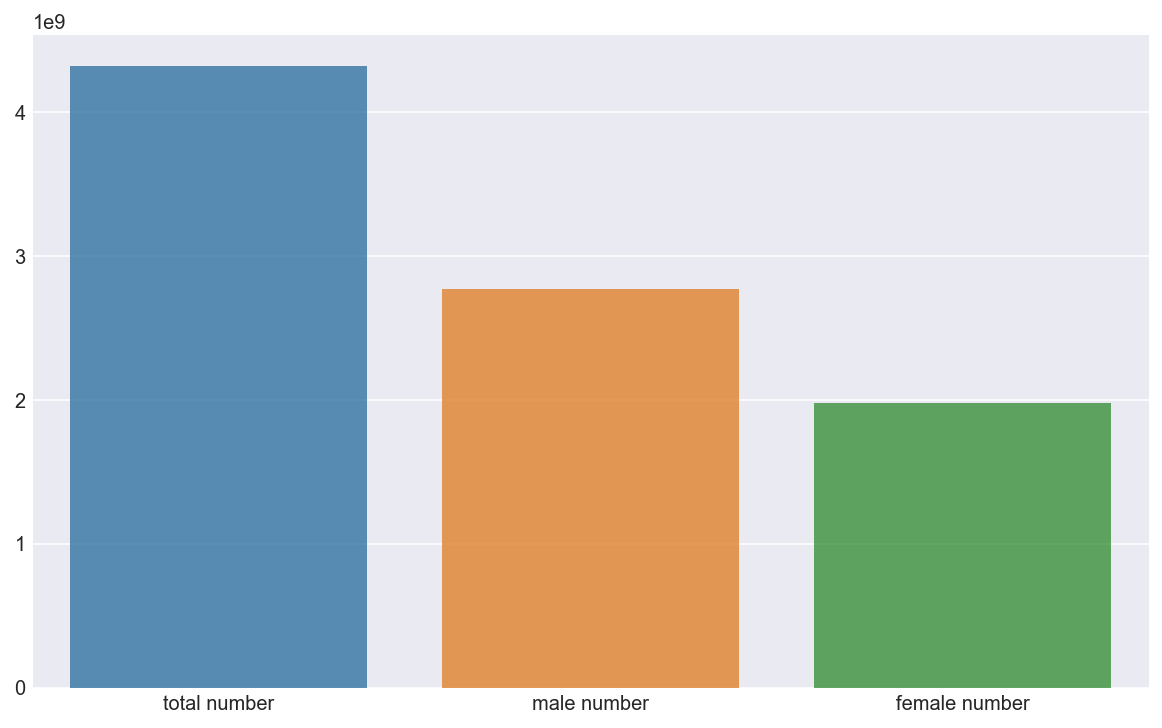

In [14]:
# Get the sum for each group

sum_tot = df1.iloc[:, 1:43]
m_tot = df1.iloc[:, 44:86]
f_tot = df1.iloc[:, 87:]


tot = []
for t in sum_tot.columns:
    tot.append(sum_tot[t].sum())


m = []
for ma in m_tot.columns:
    m.append(m_tot[ma].sum())


f = []
for fa in f_tot.columns:
    f.append(f_tot[fa].sum())

# Plot

x = ['total number', 'male number', 'female number']
y = [sum(tot), sum(m), sum(f)]

plt.subplots(figsize=(10,6))
sns.barplot(x,y, alpha = 0.8);



<a id='q2'></a>
### Research Question 2: What is distribution of female children who was out of primary school from 1980 to 1995?

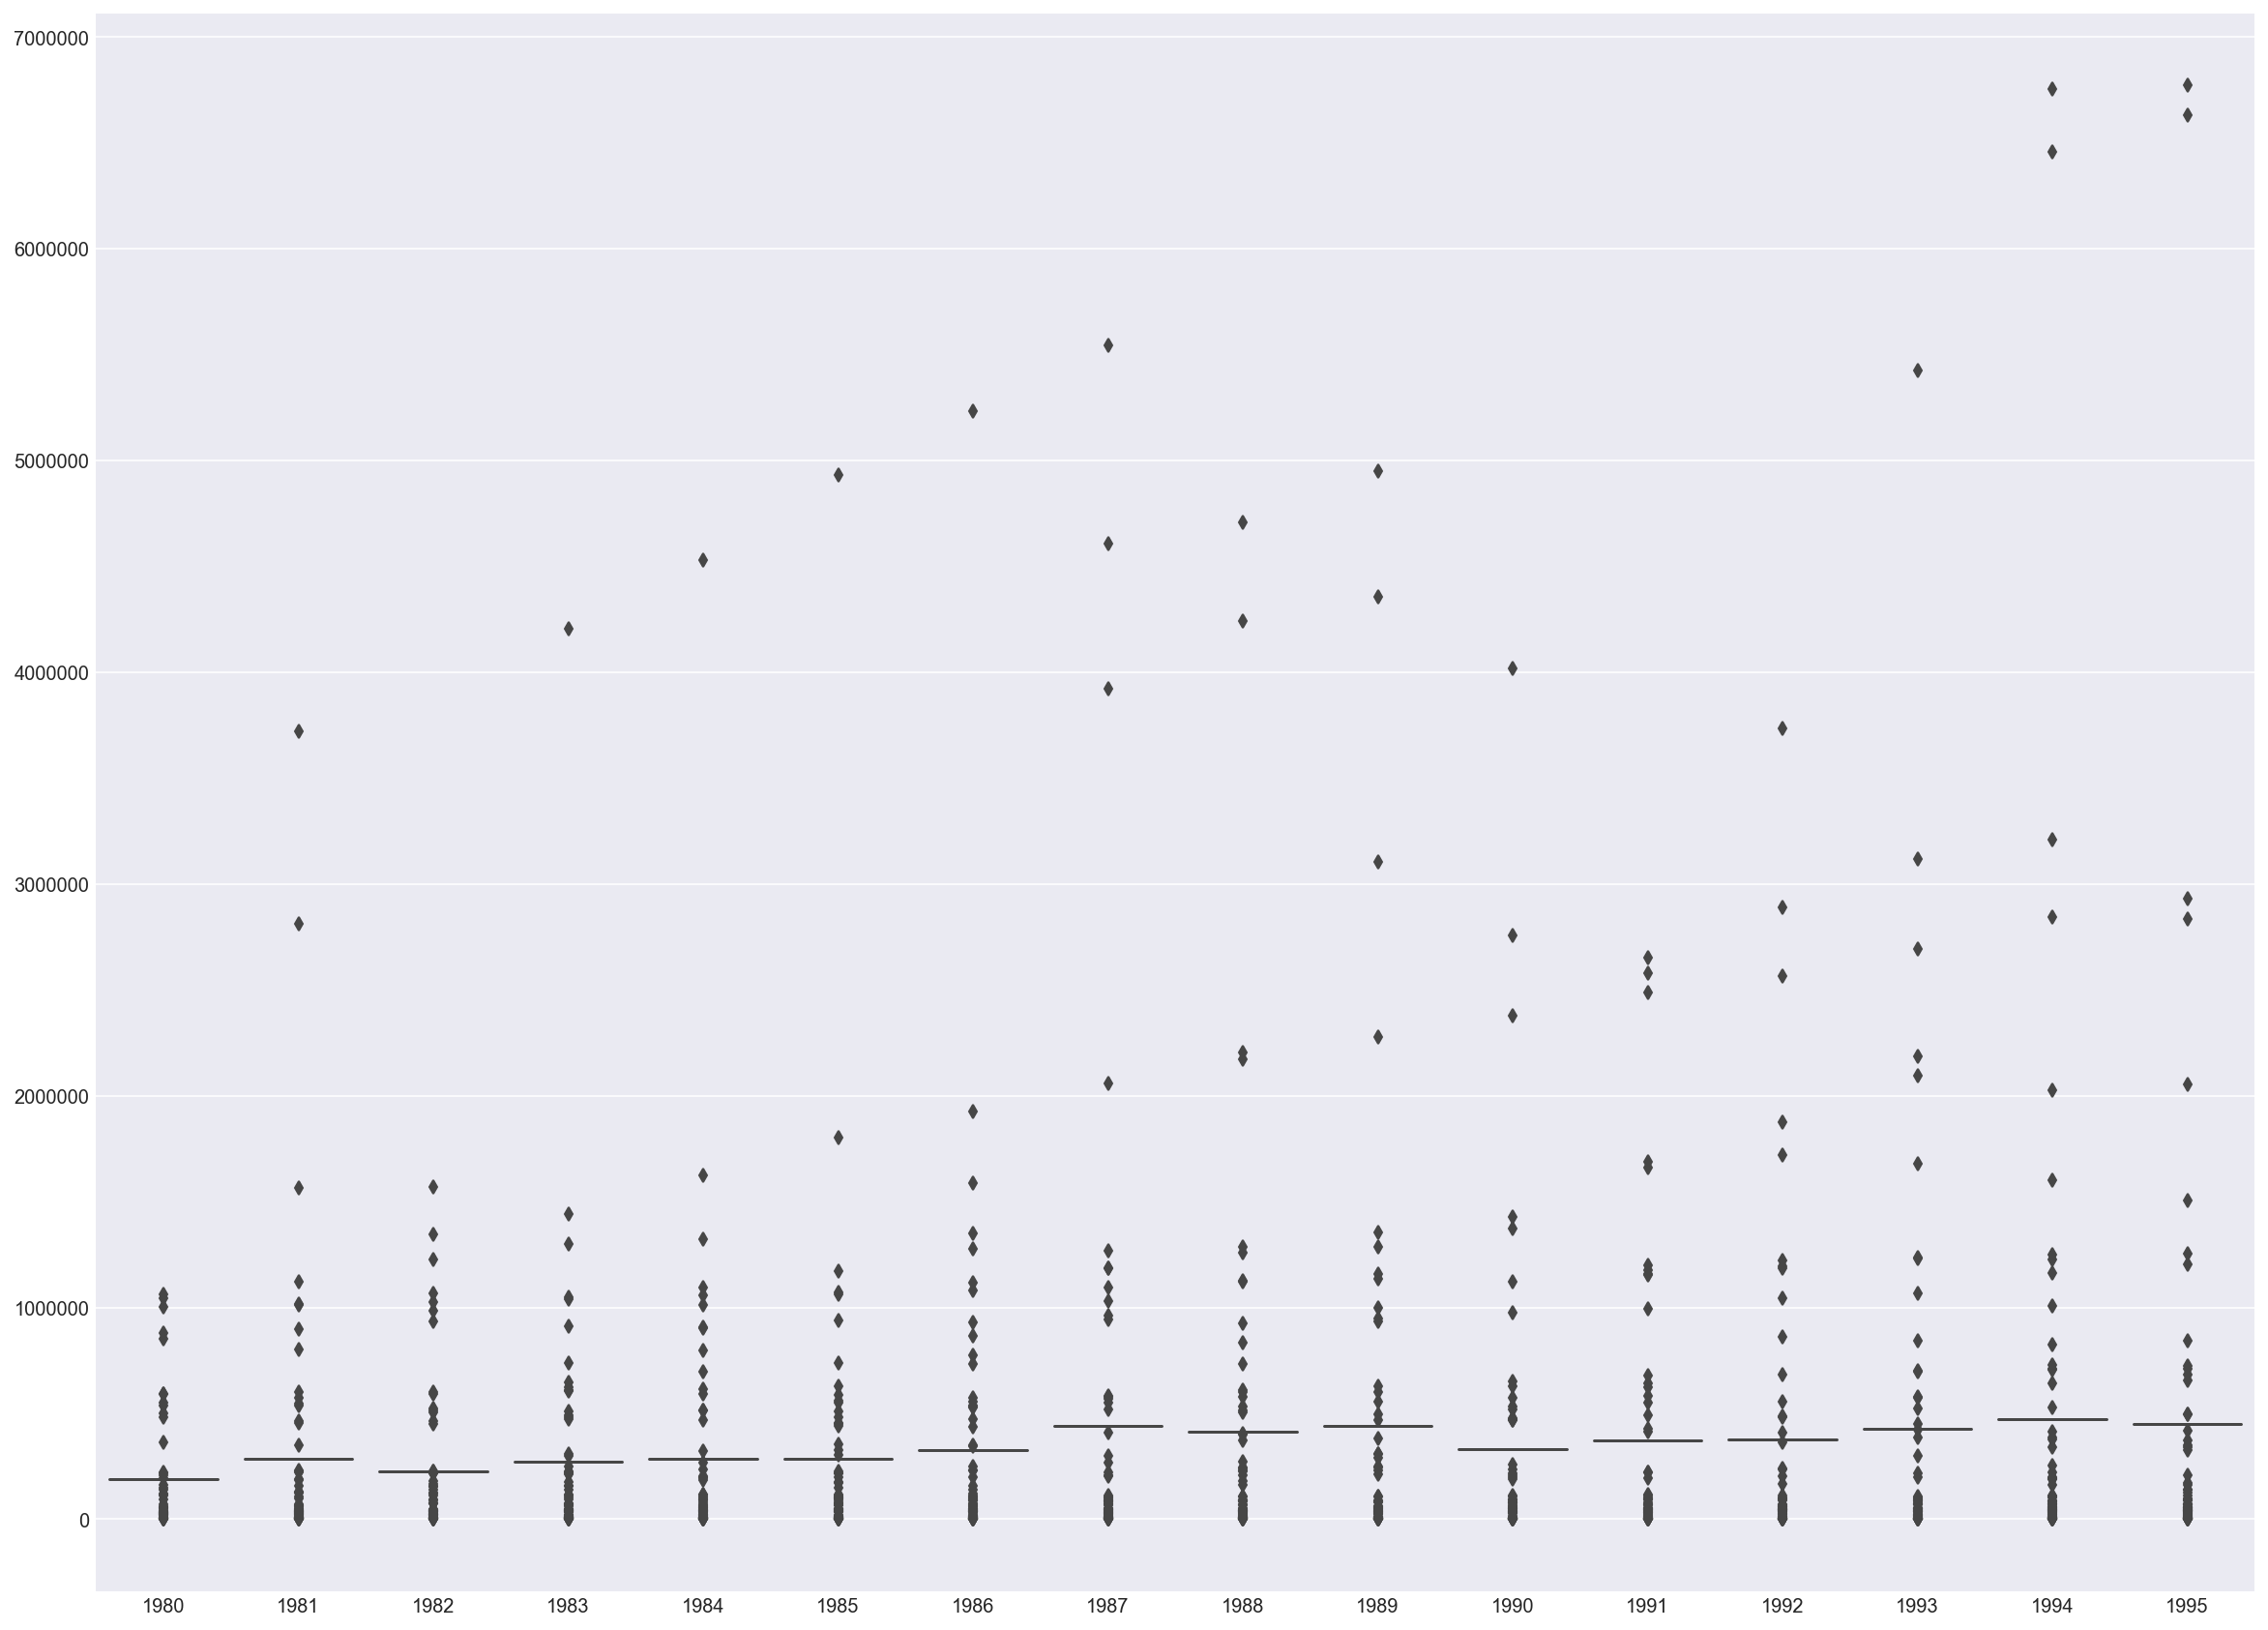

In [15]:
# Target the year and plot

sum_tot1 = sum_tot.iloc[:, 10:26]
new_col = []
for ele in sum_tot1.columns:
    new_col.append(ele.split('_x')[0])
   
sum_tot1.columns = new_col  

plt.figure(figsize=(20,15))
sns.boxplot(data = sum_tot1);

<a id='q3'></a>
### Research Question 3: What are numbers of children out of school in total, by male and female in China, 1985?

In [16]:
china = df1.copy()
china = china.set_index('country')
tot_chi = china.loc['China', '1985_x']
f_chi = china.loc['China', '1985_y']
m_chi = china.loc['China', '1985']

print('The numbers of children out of school in total, by male and female in China were \
{0:.0f}, {1:.0f} and {2:.0f} in 1985, respectively.'.format(tot_chi, f_chi, m_chi))

The numbers of children out of school in total, by male and female in China were 284172, 177367 and 122195 in 1985, respectively.


<a id='q4'></a>
### Research Question 4: What are relationship of children out of school of female in China in russian and usa over time? Which has a better trend?

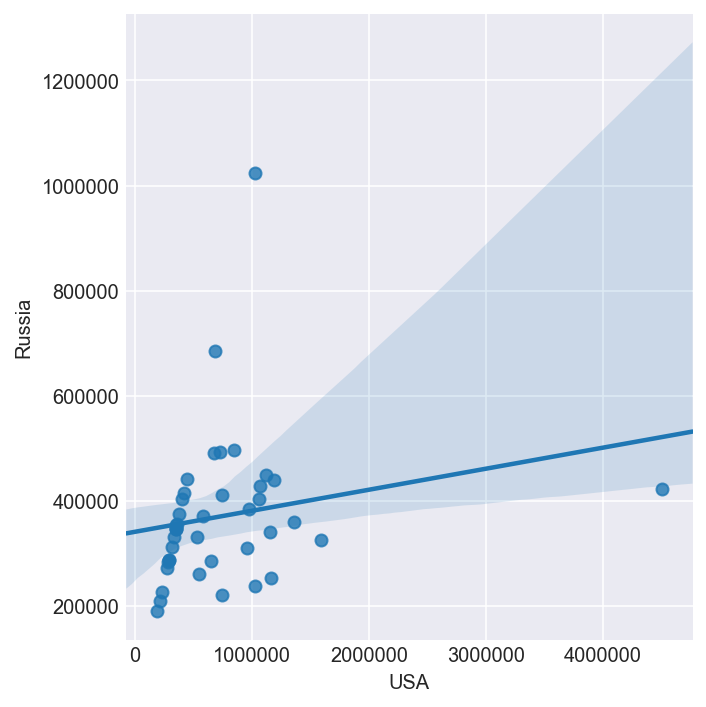

In [17]:
rus_us = df1.iloc[:, 0:42].copy()


new_col1 = []
for ele in rus_us:
    new_col1.append(ele.split('_x')[0])
   
rus_us.columns = new_col1

rus_us = rus_us.set_index('country')
rus_us_df = pd.DataFrame(columns=['USA','Russia'])
rus_us_df['USA'] = rus_us.loc['United States'].values
rus_us_df['Russia'] = rus_us.loc['Russia'].values


sns.lmplot(x = 'USA', y = 'Russia', data = rus_us_df);



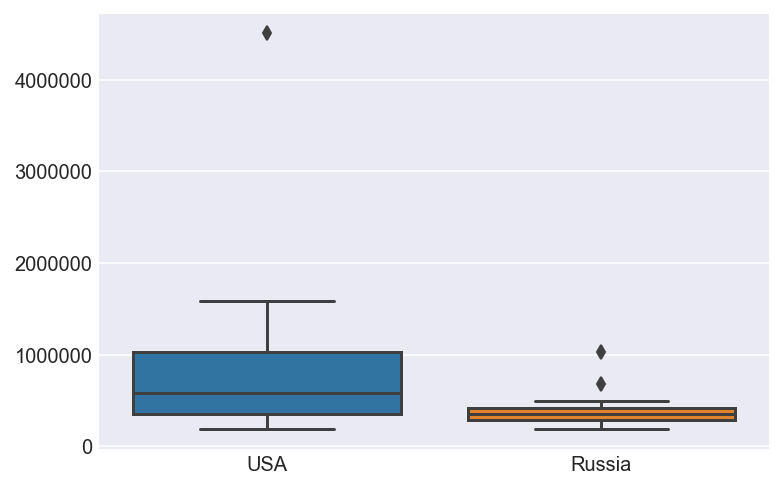

In [18]:
sns.boxplot(data=rus_us_df);

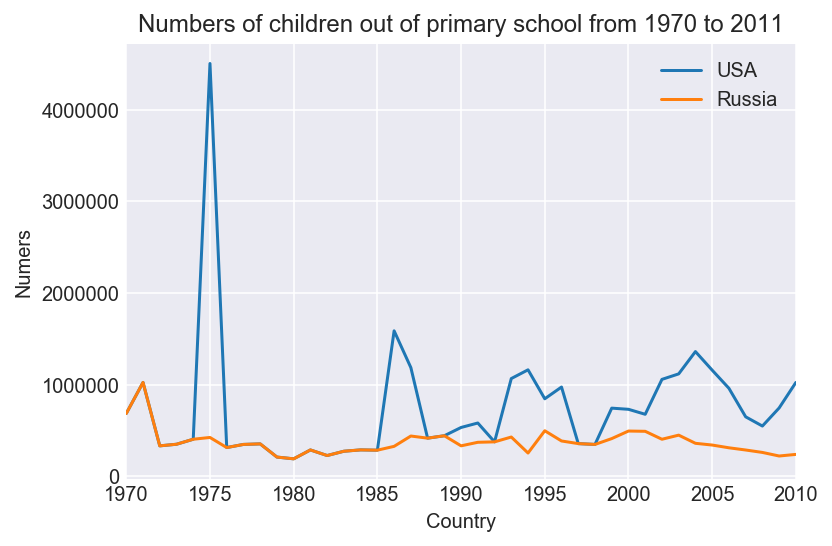

In [19]:
rus_us_df['year'] = rus_us.columns
rus_us_df.index = rus_us_df.year
rus_us_df.plot();
plt.ylabel('Numers')
plt.xlabel('Country')
plt.title('Numbers of children out of primary school from 1970 to 2011');


> There is a positive correlation between children droped out of primary school in Russia and USA. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level. The trend of children out of school in USA is much higher than that of Russia over that past 40 years.

<a id='q5'></a>
### Research Question 5: What is the overall trend for children out of primary school over the years?

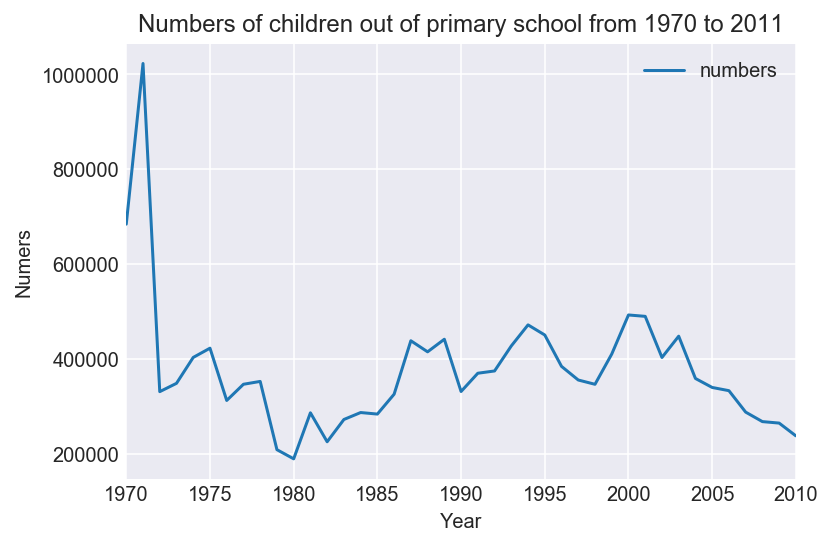

In [20]:
overall_df = pd.DataFrame(columns=['year','numbers'])
overall_df['year'] = rus_us.columns 
n_list =[]

for n in rus_us.columns:
    n_list.append(rus_us[n].mean())


overall_df['numbers'] = np.array(n_list)
overall_df.index = overall_df.year

overall_df.plot();
plt.ylabel('Numers')
plt.xlabel('Year')
plt.title('Numbers of children out of primary school from 1970 to 2011');

> From the analysis we can conclude that the overall trend of children out of primary school had been descreasing starting between 1970 and 1975 at which point of time the numbers fell down dramatically

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The dataset across 41 years from 1970 to 2011. 

> The limitations of current study was that the structure is only 275*42 in shape, thus the analysis would not be much reliable due to small scale samples.

> In addition, the parameters in the dataset is very simple, it only focus on the number of children out of school.



In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Children_Out_of_School_20180108.ipynb'])

0